# Linear Models in Machine Learning on Python: Linear Regression 2

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from scipy.stats.mstats import normaltest
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, 
                                   PolynomialFeatures)
from scipy.special import inv_boxcox
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from matplotlib import animation as F
from IPython.display import HTML
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
import matplotlib.animation as animation
import matplotlib.ticker as ticker
import plotly as py
import plotly.express as px
import warnings
warnings.filterwarnings('ignore', module='sklearn')
sns.set()

This is a script of codes that I made in order to practice while I was learning machine learning. Afterwards, I thought I could edit and develop this notebook, so that other people could make use of it and perhaps expedite their learning process. This is not a complete guide to linear models, however, it contains a lot of practices and mathematical aspects of algortihms. There will be three main notebooks about Linear Models 
Part 1: Linear Regression, Part 2: Logistic Regression, and Part 3: Generalized Linear Models. I will introduce different steps of feature processing and different datasets in which I apply these models, thereby, even if I split them into 3 main parts there may be more than 3 notebooks. I will try to explain algorithms and code as much as possible, however, these topics may be hard for a beginner. In fact, I did not intend this notebook for beginners but for those who have some idea of how algorithms work and want to improve their understanding of both mathematics behind the algorithms and codes to implement the algorithm. In each section, I added external resources that I found helpful when I was learning machine learning. Moreover, I reviewed some processes a couple of time in each example, my aim for doing this is to get you more familiar with these steps. I think this notebook can help a lot to people who intuitively know the algorithms to some extent but want to dive deeper and get some experience. I hope some people can make use of this notebook and learn these machine learning models.

This my second notebook on Regression. In the second part I will focus on some more visualization techniques, scaling and skewed data.

## Scaling

Before moving on the second regression example I want to expand our knowledge on scaling. We already came familiar with standardization, yet one thing that i would like to mention is that normally scaling should not affect performance of regression since the idea of regression (predicting continuous values by using linear combinations) applies to all kind of scale of data yet the advantage comes with generally optimization because scaling values will improve convergence performance and speed. To find more about feature scaling [link](https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/)

Now let's get on with normalization. Normalization (a.k.a mix-max scaling) is the process of scaling our value between 0 and 1. $$x=\frac{\left(x-x_{min}\right)}{x_{max}-x_{min}}$$  In this transformation we use maximum and minimum values, therefore, outliers can affect normalization a lot.  


We generally use normalization with neural networks but I would not like to go into details now. On the other hand, if you would like to learn more about normalization and other advantages of scaling techniques, you can find extra information in the link that I shared above.

In [18]:
ames_housing = pd.read_csv("Ames_Housing_Data.tsv", sep='\t')

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

data = ames_housing.select_dtypes(include=numerics) # finding numerical features for scaling

In [16]:
from sklearn.preprocessing import MinMaxScaler
MinMaxScaler = MinMaxScaler()
# transform data
scaled = MinMaxScaler.fit_transform(newdf)

It's almost the same as StandardScaler. Here I directly used fit_transform() method which calculates the values like max and min then directly transforms the daha. We could instead fit the data and transform it later as well in the case of standart scaling above.

We also have another scaler called MaxAbsScaler(). This scaler isn't widely used but you can make us of it in some cases. It scales values by its maximum absolute value.

In [19]:
from sklearn.preprocessing import MaxAbsScaler

MaxScaler=MaxAbsScaler()

data_maxabs=MaxScaler.fit(data)

maxabs_transformed=data_maxabs.transform(data)

## Regression Example 2 - Dealing with Skewed Predictors

In the first part I showed how to deal with target variable when it is not normally distributed. In this example I will show what we can do when our predictors are skewed. I will do the same steps in the first example as well but this time I will slightly change the code so that I can show more examples.

In [20]:
data = pd.read_csv('Ames_Housing_Sales.csv', sep=',') #retriving the data.

Finding categorical columns.

In [22]:
dt = data.dtypes == object
columns_categorical = data.columns[dt]

Let's look at how many categorical columns we have

In [23]:
columns_categorical

Index(['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC',
       'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig',
       'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood',
       'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition',
       'SaleType', 'Street', 'Utilities'],
      dtype='object')

Let's find out how many extra columns will be generated when we encode them. To do that, we can use some lambda expression and nunique() function which returns number of distinc elements.

In [24]:
num_enc_cols = (data[columns_categorical].apply(lambda x: x.nunique()).sort_values(ascending=False))


# If there is only one value we don't need to encode the column. That's why, I chech columns that has more than one value.
columns_enc = num_enc_cols.loc[num_enc_cols>1]

# Number of one-hot encoded columns should be one less than that of categories. Like drop_first=True 
columns_enc -= 1

columns_enc.sum() #number of extra columns that will be generated.

215

Here I also would like to show something different for encoding as well. Previously we talked about ordinal encoder and one-hot encoder. I also want to show you LabelEncoder() which also works like ordinal encoder. They both do the same things but the difference is the as you might guess from its name LabelEncoder is used for encoding target variable. For instance, if we have a logistic regression task and we want to convert our target variable we can use label encoder. Label encoder can encode (n_samples,1) while ordinal encoder can encode (n_samples, n_features). However, with a simple loop we can use label encoder just like an ordinal encoder which is demonstrated below.

In [25]:
data_copied = data.copy()

# The encoders
LabelEnc = LabelEncoder()

for col in num_enc_cols.index:
    #Here we have two main things to do integer encoding the string categories and removing the original columns in the dataframe.
    
    # Integer encoding
    data_copied[col] = LabelEnc.fit_transform(data_copied[col]).astype(int)
    
    # Removing the original column
    data_labelencoded = data_copied.drop(col, axis=1)

In [26]:
data_labelencoded

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856.0,854.0,0.0,1,3,0,3,3,706.0,0.0,...,8,0.0,1,8,856.0,0.0,2003,2003,2008,208500.0
1,1262.0,0.0,0.0,1,3,0,3,1,978.0,0.0,...,8,0.0,1,6,1262.0,298.0,1976,1976,2007,181500.0
2,920.0,866.0,0.0,1,3,0,3,2,486.0,0.0,...,8,0.0,1,6,920.0,0.0,2001,2002,2008,223500.0
3,961.0,756.0,0.0,1,3,0,1,3,216.0,0.0,...,8,0.0,1,7,756.0,0.0,1915,1970,2006,140000.0
4,1145.0,1053.0,0.0,1,4,0,3,0,655.0,0.0,...,8,0.0,1,9,1145.0,192.0,2000,2000,2008,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,953.0,694.0,0.0,1,3,0,2,4,0.0,0.0,...,8,0.0,1,7,953.0,0.0,1999,2000,2007,175000.0
1375,2073.0,0.0,0.0,1,3,0,3,3,790.0,163.0,...,8,0.0,1,7,1542.0,349.0,1978,1988,2010,210000.0
1376,1188.0,1152.0,0.0,1,4,0,1,3,275.0,0.0,...,8,0.0,1,9,1152.0,0.0,1941,2006,2010,266500.0
1377,1078.0,0.0,0.0,1,2,0,3,2,49.0,1029.0,...,8,0.0,1,5,1078.0,366.0,1950,1996,2010,142125.0


I also show one-hot encoding version because I will compare the metrics of both.

In [27]:
data_copied = data.copy()

# Defining the encoders
LabelEnc = LabelEncoder()
OnehotEnc = OneHotEncoder(drop="first")

for col in num_enc_cols.index:
    
    # Integer encoding
    label_dat = LabelEnc.fit_transform(data_copied[col]).astype(int)
    
    # Removing the original column
    data_copied = data_copied.drop(col, axis=1)

    # One hot encoding the data
    onehot_dat = OnehotEnc.fit_transform(label_dat.reshape(-1,1))

    # Creating unique column names
    n_cols = onehot_dat.shape[1]
    col_names = ['_'.join([col, str(x)]) for x in range(n_cols)]

    # Create the new dataframe
    new_df = pd.DataFrame(onehot_dat.toarray(), 
                          index=data_copied.index, 
                          columns=col_names)

    # Appending new data
    data_onehotcoding = pd.concat([data_copied, new_df], axis=1)

In [28]:
OnehotEnc.categories_

[array([0, 1])]

In [29]:
print(data.shape[1])

# Removing the string columns from the dataframe
data = data.drop(num_enc_cols.index, axis=1)

print(data.shape[1])

80
37


 I have used a clean version of the dataset for this example so we don't need to deal with missing values.

In [30]:
data.columns[data.isnull().sum() > 1]

Index([], dtype='object')

In [31]:

y_col = 'SalePrice'

# Split the data that is not label-hot encoded
feature_cols = [x for x in data.columns if x != y_col]
X_data = data[feature_cols]
y_data = data[y_col]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, 
                                                    test_size=0.3, random_state=42)

# Split the data that is label encoded
feature_cols = [x for x in data_labelencoded.columns if x != y_col]
X_data_le = data_labelencoded[feature_cols]
y_data_le = data_labelencoded[y_col]

X_train_le, X_test_le, y_train_le, y_test_le = train_test_split(X_data_le, y_data_le, 
                                                    test_size=0.3, random_state=42)


# Split the data that is one-hot encoded
feature_cols = [x for x in data_onehotcoding.columns if x != y_col]
X_data_ohc = data_onehotcoding[feature_cols]
y_data_ohc = data_onehotcoding[y_col]

X_train_ohc, X_test_ohc, y_train_ohc, y_test_ohc = train_test_split(X_data_ohc, y_data_ohc, 
                                                    test_size=0.3, random_state=42)

In [32]:
# Compare the indices to ensure they are identical
(X_train_ohc.index == X_train.index).all()
(X_train_le.index == X_train.index).all()

True

## Skewness

Time to deal with skewness. I will use `skew()` function to find out which features are skewed and then show it in a dataframe. 

In [33]:
# Create a list of float colums to check for skewing
mask = data.dtypes ==float
float_cols = data_copied.columns[mask]

Here I will use a skewness limit.

In [34]:
skew_limit = 0.75
skew_vals = data_copied[float_cols].skew()

skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {0}'.format(skew_limit)))

skew_cols

,Skew
MiscVal,24.841008
PoolArea,14.406273
LotArea,12.013038
LowQualFinSF,10.712587
3SsnPorch,10.007116
BsmtFinSF2,4.194649
ScreenPorch,3.987031
EnclosedPorch,3.213038
LotFrontage,2.712348
MasVnrArea,2.601035


Let's see what will happen to features when we apply log transformation. I will use `np.log1p` function on one of the features above and show visually what happens.

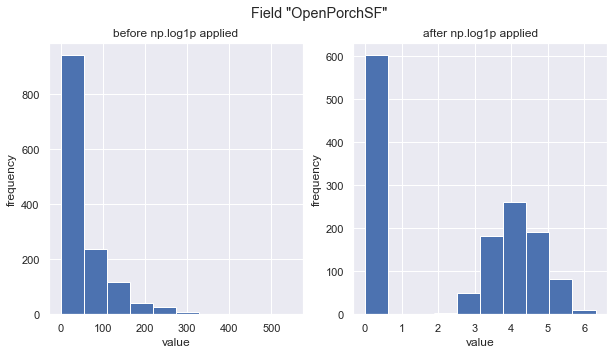

In [35]:
field = "OpenPorchSF"
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))
data_copied[field].hist(ax=ax_before)

data_copied[field].apply(np.log1p).hist(ax=ax_after) # Okay now let's apply log transofmration.

ax_before.set(title='before np.log1p applied', ylabel='frequency', xlabel='value') # First graoh without transformation
ax_after.set(title='after np.log1p applied', ylabel='frequency', xlabel='value') # Second graoh after transformation
fig.suptitle('Field "{}"'.format(field)); # Passing the column name that we used.
# a little bit better

Now Let's apply this procedure to all the skewed columns we have. We can do this with a basic for loop. Notice that I apply this transformation for all the dataframes.

In [36]:
# There are some warning problems. Let's mute them for now.
pd.options.mode.chained_assignment = None

for col in skew_cols.index.tolist():
    if col == "SalePrice":
        continue
    X_train[col] = np.log1p(X_train[col])
    X_test[col]  = X_test[col].apply(np.log1p)  # same thing
    
    X_train_le[col] = np.log1p(X_train_le[col])
    X_test_le[col]  = X_test_le[col].apply(np.log1p)  # Label Encoded dataframe
    
    X_train_ohc[col] = np.log1p(X_train_ohc[col])
    X_test_ohc[col]  = X_test_ohc[col].apply(np.log1p)  # One How Encoded dataframe

Let's apply linear regression now.

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

LR = LinearRegression()

# Storage for error values
error_df = list()

# Data that have not been one-hot encoded
LR = LR.fit(X_train, y_train)
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)


error_df.append(pd.Series({'Train_MSE': int(mean_squared_error(y_train, y_train_pred)),
                           'Test_MSE' : int(mean_squared_error(y_test,  y_test_pred)),
                           'Train_RSquared': format(r2_score(y_train_pred, y_train),'f'),
                          'Test__RSquared': format(r2_score(y_test_pred, y_test))},
                           name='No Encoding'))

# Data that have been one-hot encoded
LR = LR.fit(X_train_ohc, y_train_ohc)
y_train_ohc_pred = LR.predict(X_train_ohc)
y_test_ohc_pred = LR.predict(X_test_ohc)

error_df.append(pd.Series({'Train_MSE': int(mean_squared_error(y_train_ohc, y_train_ohc_pred)),
                           'Test_MSE' : int(mean_squared_error(y_test_ohc,  y_test_ohc_pred)),
                           'Train_RSquared': format(r2_score(y_train_ohc_pred, y_train_ohc),'f'),
                          'Test__RSquared': format(r2_score(y_test_ohc_pred, y_test_ohc),'f')},
                          name='One-hot Encoded'))

# Data that have been label encoded
LR = LR.fit(X_train_le, y_train_le)
y_train_le_pred = LR.predict(X_train_le)
y_test_le_pred = LR.predict(X_test_le)

error_df.append(pd.Series({'Train_MSE': int(mean_squared_error(y_train_le, y_train_le_pred)),
                           'Test_MSE' : int(mean_squared_error(y_test_le,  y_test_le_pred)),
                          'Train_RSquared': format(r2_score(y_train_le_pred, y_train_le),'f'),
                          'Test__RSquared': r2_score(y_test_le_pred, y_test_le)},
                          name='Label Encoded'))

# Assemble the results
error_df = pd.concat(error_df, axis=1)
error_df

,No Encoding,One-hot Encoded,Label Encoded
Train_MSE,1243839441,1243839441,817646847
Test_MSE,1317925960,1317925960,1955716678
Train_RSquared,0.755174,0.755174,0.851518
Test__RSquared,0.7587935916701832,0.758794,0.705738


Here I will demonstrate an interesting example. I will show the results of different regression models in which I used different scalers and encoding types.

In [38]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler


scalers = {'Standard': StandardScaler(),
           'Minmax': MinMaxScaler(),
           'Maxabs': MaxAbsScaler()}

training_test_sets = {
    'Not_encoded': (X_train, y_train, X_test, y_test),
    'One_hot_encoded': (X_train_ohc, y_train_ohc, X_test_ohc, y_test_ohc),
      'Label Encoded':(X_train_le,y_train_le, X_test_le, y_test_le)}


# Get the list of float columns, and the float data
# so that we don't scale something we already scaled. 
# We're supposed to scale the original data each time
mask = X_train.dtypes == float
float_columns = X_train.columns[mask]

# initialize model
LR = LinearRegression()

# iterate over all possible combinations and get the errors
errors = {}
errors2={}
for encoding_label, (_X_train, _y_train, _X_test, _y_test) in training_test_sets.items():
    for scaler_label, scaler in scalers.items():
        trainingset = _X_train.copy()  # copy because we dont want to scale this more than once.
        testset = _X_test.copy()
        trainingset[float_columns] = scaler.fit_transform(trainingset[float_columns])
        testset[float_columns] = scaler.transform(testset[float_columns])
        LR.fit(trainingset, _y_train)
        predictions = LR.predict(testset)
        key = encoding_label + ' - ' + scaler_label +' ' + 'scaling RSquared ='
        errors[key] = mean_squared_error(_y_test, predictions)
        errors2[key] = r2_score(predictions, _y_test)

errors = pd.Series(errors)
errors2 = pd.Series(errors2)

error_df2 = list()
x=0
for key, error_val in errors2.items():
    if(x/3==1 or x/6==1):
        print('-' * 80)
        print(key, error_val)
    else:
        print(key, error_val)
    
    x=x+1

Not_encoded - Standard scaling RSquared = 0.7587935916701806
Not_encoded - Minmax scaling RSquared = 0.7587935916701836
Not_encoded - Maxabs scaling RSquared = 0.7587935916701826
--------------------------------------------------------------------------------
One_hot_encoded - Standard scaling RSquared = 0.7587935916701811
One_hot_encoded - Minmax scaling RSquared = 0.758793591670184
One_hot_encoded - Maxabs scaling RSquared = 0.7587935916701842
--------------------------------------------------------------------------------
Label Encoded - Standard scaling RSquared = 0.7057380653025667
Label Encoded - Minmax scaling RSquared = 0.7057380653025691
Label Encoded - Maxabs scaling RSquared = 0.7057380653025677


## Visualizations

In this part of the notebook I will download another housing dataset and focus on visualarizations.

In [39]:
housing=pd.read_csv("californiahousing.csv")

In [40]:
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Let's start with some basic functions that we already know.

In [41]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [42]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [43]:
housing["ocean_proximity"].value_counts()#let's see value counts 

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Let's use histogram function in matplotlib to look at distribution of every column.

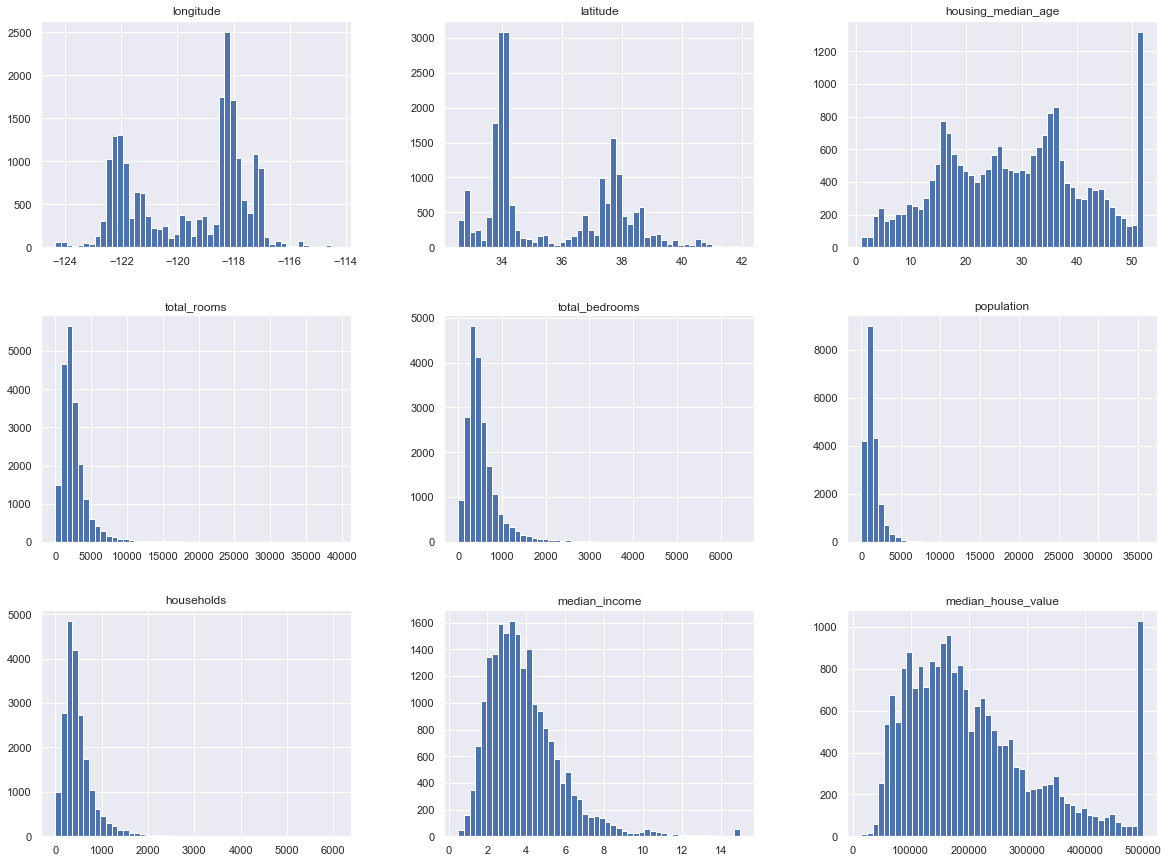

In [44]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

Can we create categorical features by using continious attributes ? Yes!!

For instance let's divide 'median_income' into 6 different categories. We can see the the main part of the data is clustered between 0 and 8 and we have some beyond 8. I will use cut function in pandas to split the numeric data into categories.

In [45]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., 7.5, np.inf],
                               labels=[1, 2, 3, 4, 5, 6])

Number of elements in every category

In [46]:
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    1423
6     939
1     822
Name: income_cat, dtype: int64

Let's also use an histogram to show it.

<AxesSubplot:>

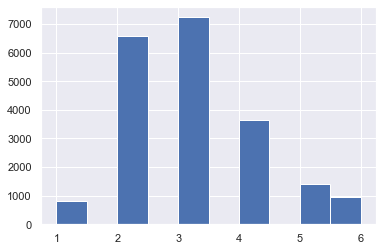

In [47]:
housing["income_cat"].hist()

In the next notebook I will use a covid dataset and show animated geographic plots but before that, let's look at some basic geoplots.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

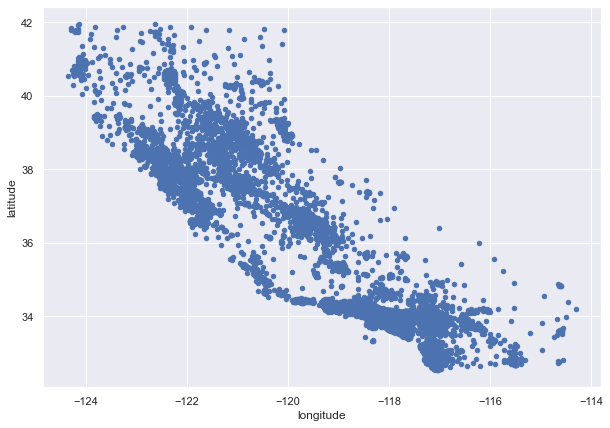

In [48]:
housing = housing.copy()
housing.plot(kind="scatter", x="longitude", y="latitude",figsize=(10,7))

What can we do if we also want to show density ? we can do so by changing alpha value.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

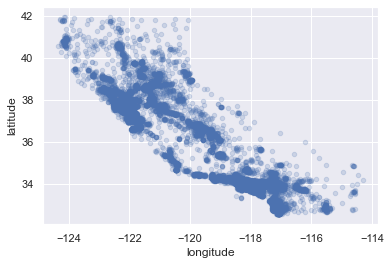

In [49]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2)

Let's get a bit more complicated and use population attribute from our dataset and combine it with house prices. Here the colormap shows the median_house_value and the circles represents distinct populations.

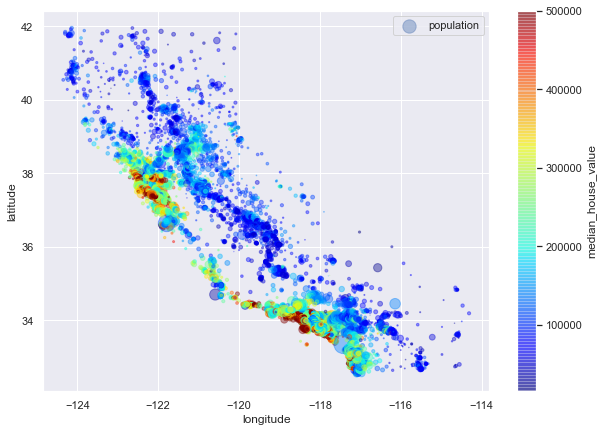

In [50]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()

#The radius of each circle represents the district’s population (option s), and the color represents the price (option c)

There is another notebook on kaggle which introduces EDA and Visualization steps on this dataset (I also get some help from this notebook), I strongly recommend checking it [link](https://www.kaggle.com/ujwalkandi/california-housing-prices-eda-and-visualization)

My favorite library for visualizations is actually seaborn so I wanted to add some seaborn plots here as well. We previously used `value_counts()` function to see count's of distinct values in ocean_proximity column, with seaborn's countplot function we can directly visualize that. 

C:\Users\gorke\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


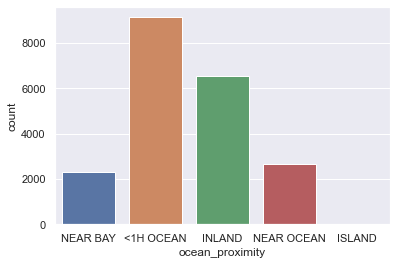

In [51]:
sns.countplot(housing['ocean_proximity']);

You can find more about this function by clicking [link](https://seaborn.pydata.org/generated/seaborn.countplot.html)

Okay I will go with visualizing some categorical features that's why I go on with ames housing dataset.

In [53]:
# To convert categorical features into dummy variables firstly need to find them
columnstoencode=ames_housing.dtypes[ames_housing.dtypes == object] # Here i filter to find categorical features
categorical=columnstoencode.index.tolist() # get a list of categorical fields.
ames_housing[categorical].head().T

,0,1,2,3,4
MS Zoning,RL,RH,RL,RL,RL
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
Lot Shape,IR1,Reg,IR1,Reg,IR1
Land Contour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub
Lot Config,Corner,Inside,Corner,Corner,Inside
Land Slope,Gtl,Gtl,Gtl,Gtl,Gtl
Neighborhood,NAmes,NAmes,NAmes,NAmes,Gilbert
Condition 1,Norm,Feedr,Norm,Norm,Norm


Let's look at value counts of every single categorical feature.

C:\Users\gorke\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\gorke\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\gorke\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\gorke\anaconda3\lib\si

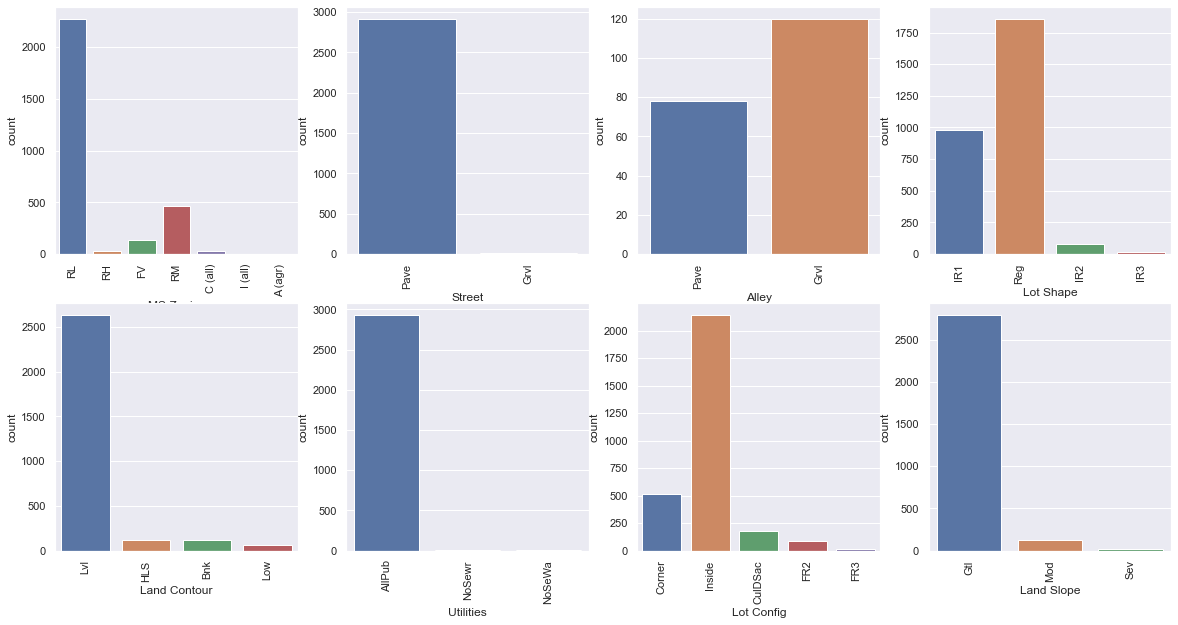

In [54]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(ames_housing[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

By using `scatterplot()` we can show the relationship between two features, by doing so, we can find out features with corelations. Let's look at the relationship between total_rooms and median_house_value. For more see the [Documentation](https://seaborn.pydata.org/generated/seaborn.scatterplot.html?highlight=scatterplot#seaborn.scatterplot)

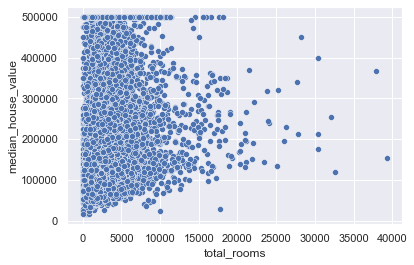

In [55]:
sns.scatterplot(x=housing['total_rooms'], y=housing['median_house_value']);

`jointplot()` is one of my favorite functions. By using it you can directly show the distribution of two features and relationship between them. You can change the plots in the marginal axis if you want. [Documentation](https://seaborn.pydata.org/generated/seaborn.jointplot.html?highlight=jointplot#seaborn.jointplot)

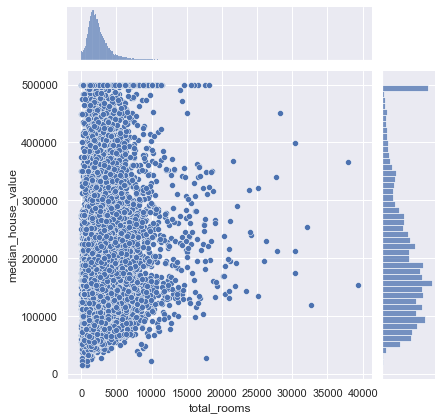

In [56]:
sns.jointplot(x=housing['total_rooms'], y=housing['median_house_value']);

Boxplot is a very important plot which show us distribution of data by using some metrics like interquartile range. I strongly recommend reading this very informative article [link](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)

C:\Users\gorke\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='median_house_value'>

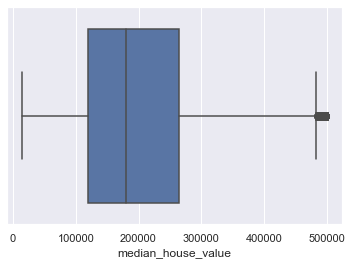

In [57]:
sorted_nb = housing.groupby(['total_rooms'])['median_house_value'].median().sort_values()
sns.boxplot(housing['median_house_value'])

Let's visualize total bedrooms and total rooms. Here I set  `alpha=0.6` and  `density=True` so that we get a transparent graph and by setting `stacked=True` I add the grid to the plot.

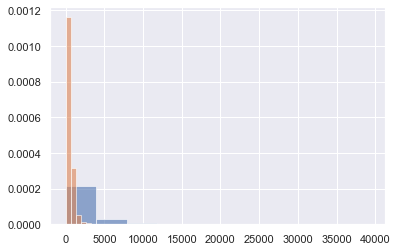

In [58]:
import matplotlib.pyplot as plt

for col in housing.columns:
    if "total" in col:
        plt.hist(housing[col], density=True, alpha=0.6, stacked = True)
    

Instead of histogram we can use kdeplot to see the distribution of the data. For more about `kdeplot()` [link](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)

total_rooms
total_bedrooms


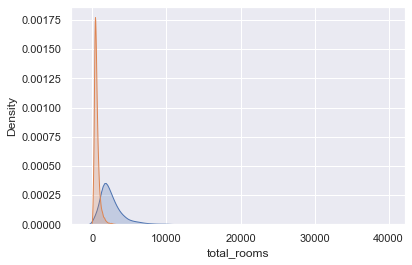

In [59]:
for col in housing.columns:
    if "total" in col:
        print(col)
        sns.kdeplot(housing[col], shade=True)

And we can use distplot to combine both histogram and kdeplot.

C:\Users\gorke\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\gorke\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


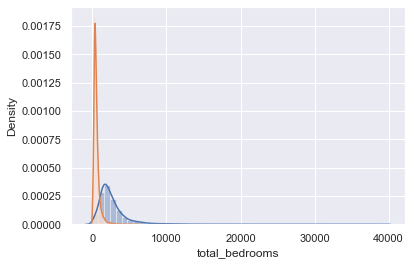

In [60]:
sns.distplot(housing['total_rooms'])
sns.distplot(housing['total_bedrooms']);

By also setting  `kde=True` we can add continious form of the function to histogram as well which gives the same result as distplot in this case.

<AxesSubplot:xlabel='total_bedrooms', ylabel='Count'>

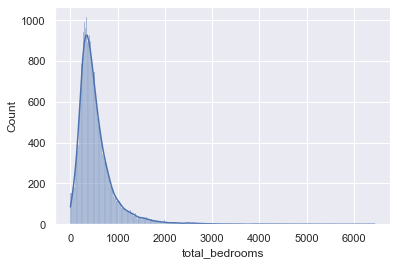

In [61]:
sns.histplot(data=housing, x="total_bedrooms", kde=True)


Here I also added a hue to look at distribution of different categories.

<AxesSubplot:xlabel='total_bedrooms', ylabel='Count'>

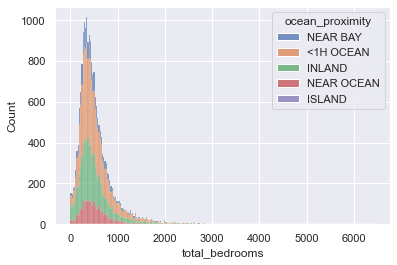

In [62]:
sns.histplot(data=housing, x="total_bedrooms", hue="ocean_proximity", multiple="stack")

Pairplot shows the relationship between each column in our datasets.

In [ ]:
sns.pairplot(housing, hue="ocean_proximity")

If we need more flexibility with our plots of pairwise relationship we can use pairgrid. 

In [ ]:
g = sns.PairGrid(housing, vars=['total_rooms', 'total_bedrooms', 'housing_median_age', 'median_house_value'],
                 hue='ocean_proximity', palette='RdBu_r') # I will only use 4 attiributes


I will add scatter plots in the diagonal

In [ ]:
g.map(plt.scatter, alpha=0.6) # let's use scatter plots in our grids
g.add_legend();

Here I will add histogram plots onto diagonal of our matrix to show the distribution of features and scatterplots elsewhere.

In [ ]:
g2 = sns.PairGrid(housing, vars=['total_rooms', 'total_bedrooms', 'housing_median_age', 'median_house_value'],
                 hue='ocean_proximity') # I will only use 4 attiributes
g2.map_diag(sns.histplot,alpha=0.8)
g2.map_offdiag(sns.scatterplot,alpha=0.8)
g2.add_legend();

We can even further go and divide the grids into 3 different parts and use 3 different plots for each.

In [ ]:
g3 = sns.PairGrid(housing, vars=['total_rooms', 'total_bedrooms', 'housing_median_age', 'median_house_value'],
                 hue='ocean_proximity') # I will only use 4 attiributes
g3.map_upper(sns.scatterplot)
g3.map_diag(sns.histplot)
g3.map_lower(sns.kdeplot)

I strongly recommend watching this [video](https://www.youtube.com/watch?v=Skyp6-RmA84) and reading the [documentation](https://seaborn.pydata.org/generated/seaborn.PairGrid.html)

Violinplot is an alternative for boxplot which also shows the distribution of data. However, violinplot uses a kendel distribution function (actually it is the function we also use for kdeplot) for estimating probability density function. This concepts can be hard for non-stat people that's why, I will not go into more details but I will share some links for extra information as always.

In [ ]:
sns.set(rc={'figure.figsize':(10,7)})
sns.set_theme(style="whitegrid")

sns.violinplot(y=housing["median_house_value"], data=housing);

I previously used jointplot() for showing correlations between two distinct features. Seaborn has a plot called regplot() where we can actually fit a regression model on two different features and we can combine it with jointplot(). In the marginal axis I show distribition of two different features and in the joint part of the plot I also draw a regression line by setting kind="reg".

In [ ]:
sns.set_theme(style="darkgrid")

g = sns.jointplot(x="total_rooms", y="median_income", data=housing,
                  kind="reg", truncate=False,
                  xlim=(0, 60), ylim=(0, 12),
                  color="m", height=7)

Seaborn lets us play with its graphs which is why I love it. There is also a youtube channel where you can find more about seaborn's plots [Kimberly Fessel](https://www.youtube.com/c/KimberlyFessel/videos)

In the upcoming notebook I will be focusing on Regularization and Cross Validation as well as hyperparameter tuning since we need to deal with alpha values in regularization.